![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope Extremes-DT Feature Extraction Trajectory example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [3]:
import numpy as np
import earthkit.data
import earthkit.regrid
import earthkit.plots
from polytope.api import Client

In [4]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [5]:
n = 1000
lons = np.linspace(0, 5*360, n)
lats = np.linspace(-85, 85, n)
linspace = np.stack([lats, lons], axis=1)
pts = linspace.tolist()

In [6]:
request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": -14,
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "167",
    "step": "0",
    "feature" :{ 
        "type" : "trajectory", 
        "points" : pts, 
        "inflation" : 0.1, 
        "inflate" : "round",
        "axes" :["latitude", "longitude"], 
    },
}

In [ ]:
data_file = "data/extremes-dt-earthkit-example-fe-trajectory.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [5]:
# Convert data to xarray
da = data.to_xarray()
da

<xarray.Dataset> Size: 8MB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 159672)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-07-06T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 1MB 0 1 2 3 4 ... 159668 159669 159670 159671
    latitude   (points) float64 1MB -85.09 -85.05 -85.02 ... 85.02 85.05 85.09
    longitude  (points) float64 1MB 0.0 0.0 0.0 0.6164 0.0 ... 0.0 359.4 0.0 0.0
    levelist   (points) float64 1MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    time       (points) int64 1MB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Data variables:
    2t         (datetimes, number, steps, points) float64 1MB 214.9 ... 273.7
Attributes:
    class:          d1
    dataset:        extremes-dt
    Forecast date:  2025-07-06T00:00:00Z
    expver:         0001
    levtype:        sfc
    step:           0
    stream:         oper
    type:           fc
    number:         0

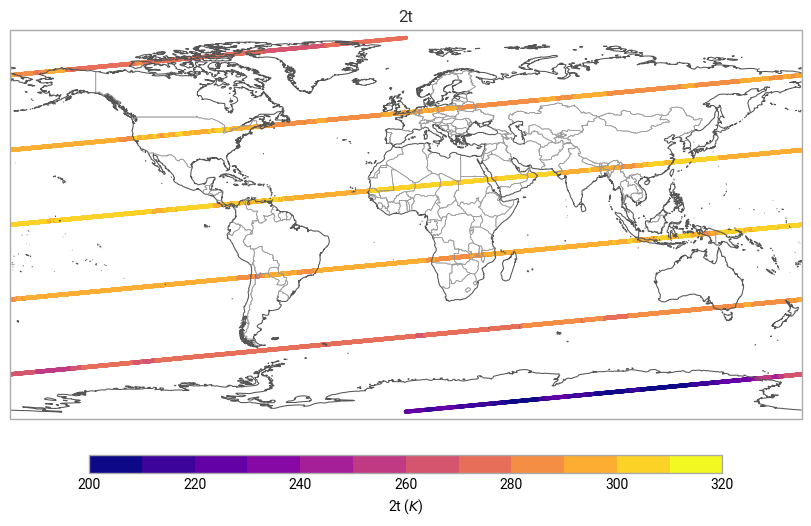

In [6]:
chart = earthkit.plots.Map()
chart.point_cloud(da['2t'], x="longitude", y="latitude")
chart.coastlines()
chart.borders()
chart.title("{variable_name}")
chart.legend()
chart.show()